<a href="https://colab.research.google.com/github/pgs2285/BigData_Analysis_License/blob/master/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC_%EC%8B%A4%EA%B8%B0_2%EC%9C%A0%ED%98%95_%EC%A4%80%EB%B9%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 유형 / 데이터 분석

------  
분석문제는 다음과 같은 순서를 따르자.
1. 필요 패키지 임포트  
2. 데이터 불러오기  
3. 데이터 살펴보기
4. 데이터 전처리
5. 분석 데이터셋 준비
6. 데이터 분석 수행
7. 성능평가 및 시각화
------  
아래는 iris 데이터를 random forest 로 분류한 예시이다.

In [ ]:
# 1. 필요 패키지 임포트
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 2. 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

# 3. 데이터 살펴보기
print(df.info())

# 4. 데이터 전처리
df['species'].replace({"setosa" : 0, "versicolor" : 1, "virginica" : 2}, inplace = True)

# 5. 분석 데이터셋 준비
X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=11)

# 6.데이터분석 수행
dt = DecisionTreeClassifier(random_state = 11)

dt.fit(X_train, y_train)

pred = dt.predict(X_test)

#7. 성능평가 및 시각화
#Accuracy (TP+TN / TP+FP+TN+FN)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred)
print(acc)

#오차행렬
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

#오차행렬에 기반한 모델 평가지표
from sklearn.metrics import classification_report
rpt = classification_report(y_test,pred)
print(rpt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
0.9333333333333333
[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



### 지도학습 - 분류  
지도학습은 정답이 있는 데이터가 주어진 상태에서 학습하는 방법이다. 크게 분류와 회귀(예측)로 구분할 수 있다.  
분류란 기존에 존재하는 데이터들간의 분류 카테고리를 학습, 파악하고 새로운 데이터에 대한 분류 카테고리를 판별하는 과정이다.  
분류는 학습 데이터를 기반으로 분류모델을 생성하고, 생성된 모델이 새로운 데이터 값이 주어졌을 때 결정값을 판별한다.  
* 이진분류 :  주어진 데이터에 대해 두 가지 중 하나로 분류하는것.  
* 다중분류 :  주어진 데이터에 대해 여러 가지 중 하나로 분류하는 것.  
  
다음과 같은 알고리즘들이 있다 -> 의사결정나무(Decision Tree), KNN(K-Nearest Neighbor), 로지스틱 회귀(Logistic Regression), 랜덤 포레스트(Random Forest),
나이브 베이즈(Naive Bayes), 신경망(Neural Network), 서포트벡터머신(SVM, Support Vector Machine)  


------
#### 의사결정나무

##### 알고리즘 개요  
* 의사결정을 위한 규칙을 나무 모양으로 조합하여 목표변수에 대한 분류를 수행하는 기법이다.  
* 목표변수가 이산형인 경우로 의사결정나무를 학습하는 것은 최종적으로 분류나무를 구축하는 과정이다.
* 의사결정나무 기법을 사용한 분석은 시장조사, 광고조사, 품질관리 등 다양한 분야에서 활용되고 있으며, 타겟 고객 분류, 고객 신용 분류, 행동 예측 등에 사용된다.  

##### 알고리즘 특징  
* 수학적 지식이 없어도 결과를 해석하고 이해하기 쉽다.  
* 수치 데이터 및 범주 데이터에 모두 사용 가능하다.
* 과대 적합의 위험이 높기 때문에, 학습모델이 과대적합 되지 않도록 적절히 조절되어야 한다.  

> 랜덤포레스트
> 부트스트래핑 기반 샘플링을 활용한 의사결정나무 생성 이후 배깅 기반 나무들을 모아 앙상블 학습하여 숲을 형성하게 되면 이를 랜덤포레스트라고 한다.



In [ ]:
# 의사결정나무를 이용한 타이타닉 데이터셋에서 탑습자들의 여러 속성데이터를 기반으로 생존여부를 예측한다.
'''
 접근방법
타이타닉 데이터셋은 여러 칼럼으로 구성되어 있으며, 이를 기반으로 Survived 칼럼의 값을 예측한다.
불필요한 속성은 제거하고 전처리과정을 거친 후, 사이킷런의 의사결정나무 알고리즘을 이용하여 학습 모델을 구축한 후 예측을 수행한다.
'''
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.describe()

d_mean = np.mean(df["Age"])
df["Age"].fillna(d_mean,inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

from sklearn.preprocessing import LabelEncoder
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])
df["FamilySize"] = df["SibSp"] + df["Parch"]

X = df[["Pclass", "Sex", "Age", "Fare","Embarked","FamilySize"]]
y = df["Survived"]

train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=11)

model = DecisionTreeClassifier(random_state=11)
model.fit(train_x,train_y)
pred = model.predict(test_x)
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_y,pred)

cnt = 0
for i,j in enumerate(pred):
  if j == test_y.iloc[i]:
    cnt += 1
print(acc,(cnt/test_x.shape[0]))


0.7877094972067039 0.7877094972067039


#### KNN 알고리즘  
##### 알고리즘 개요  
* KNN 알고리즘은 지도학습의 한 종류로, 정답이 있는 데이터를 사용하여 분류 작업을 한다.
* 서로 가가운 점은 유사하다는 가정하에, 데이터로부터 거리가 가까운 K개의 다른 데이터의 정답을 참조하여 분류한다.  
> KNN알고리즘은 변수별 단위가 무엇이냐에 따라 거리가 달라지고 분류 결과가 달라질 수 있다.
따라서 KNN 알고리즘을 적용할때는 사전에 데이터를 표준화 해야한다.

##### 알고리즘 특징  
* 동작원리가 단순하여 이해하기 쉬우며, 알고리즘이 간단하여 구현하기 쉽다.
* 거리 기반의 연산으로, 숫자로 구분된 속성에 우수한 성능을 보인다.  
* 하나의 데이터를 예측할 때마다 전체 데이터와의 거리를 계산하기 때문에 차원(벡터)의 크기가 크면 계산량이 많아진다.  

In [ ]:
# iris 데이터셋을 이용하여 꽃잎의 길이와 너비, 꽃받침의 길이와 너비를 가지고 붓꽃의 품종을 분류하는 문제를 KNN알고리즘을 사용해서 해결한다.
# KNN 알고리즘은 K값에 따라서 분류의 정확도가 달라지므로, 적절한 K값을 찾는것이 매우 중요하다.
# ex) k = 3이면 새로운 데이터로부터 가장 가까운 이웃 3개를 찾고, 그 중에서 가장 개수가 많은 값으로 분류한다.

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["sepal_length"] = scaler.fit_transform(df[["sepal_length"]])
df["sepal_width"] = scaler.fit_transform(df[["sepal_width"]])
df["petal_length"] = scaler.fit_transform(df[["petal_length"]])
df["petal_width"] = scaler.fit_transform(df[["petal_width"]])

X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = df["species"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)
print(X_train.shape, y_train.shape)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, pred)
print(acc)

(120, 4) (120,)
0.9333333333333333


#### SVM(Support Vector Machine) 알고리즘
##### 알고리즘 개요  
* 서포트벡터머신은 기계학습의 분야 중 하나로 패턴 인식, 자료 분석을 위한 지도학습 모델이며, 주로 분류와 회귀 분석을 위해 사용한다.
* 두 카테고리 중 어느 하나에 속한 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만든다.
* 만들어진 분류 모델은 데이터가 사상된 공간에서 경계로 표현되는데 SVM알고리즘은 그 중 가장 큰 폭을 가진 경계를 찾는 알고리즘 이다.  
##### 알고리즘 특징
* 커널 트릭을 사용함으로써 다양한 데이터의 특성에 맞는 분류를 수행할 수 있다.
* 비교적 적은 학습데이터로도 정확도가 높은 분류를 기대할 수 있다. (전처리 과정을 통해 데이터의 특성을 잘 표현해야한다)  
* 변수가 많은경우 결정 경계 및 데이터의 시각화가 어려워 분류 결과의 이해가 어렵다.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
d_mean = np.mean(df["Age"])
df["Age"].fillna(d_mean, inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace =True)
df.drop("Cabin", axis = 1, inplace =True)
df["FamilySize"] = df["SibSp"] + df["Parch"]

onehot_Sex = pd.get_dummies(df["Sex"])
onehot_Embarked = pd.get_dummies(df["Embarked"])

df = pd.concat([df,onehot_Sex,onehot_Embarked], axis = 1)
df.drop("Sex", axis = 1, inplace = True)
df.drop("Embarked", axis = 1, inplace = True)

X = df[["Pclass", "Age", "Fare", "FamilySize","female","male","C","Q","S"]]
y = df["Survived"]

svc = SVC(kernel='rbf')
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =10
                                                    )

print(x_train.shape, y_train.shape)

svc.fit(x_train, y_train)
pred = svc.predict(x_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print("정확도 " , acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

mat = confusion_matrix(y_test,pred)
print(mat)

rep = classification_report(y_test,pred)
print(rep)

(623, 9) (623,)
정확도  0.7238805970149254
[[167   7]
 [ 67  27]]
              precision    recall  f1-score   support

           0       0.71      0.96      0.82       174
           1       0.79      0.29      0.42        94

    accuracy                           0.72       268
   macro avg       0.75      0.62      0.62       268
weighted avg       0.74      0.72      0.68       268



#### 로지스틱 회귀
##### 알고리즘 개요
* 로지스틱 회귀 알고리즘은 회귀라는 명칭을 갖고 있지만, 회귀가 주로 예측을 하는 것과는 달리 정답이 있는 데이터를 사용하여 분류 작업을 한다.
* 시그모이드 함수의 출력값을 각 분류 항목에 속하게 될 확률값으로 사용하며, 이 값은 0과 1사이의 실수이다.
* 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류하는 이진 분류 모델이다.

##### 알고리즘 특징
* 선형 회귀의 결과를 입력 값으로 받아 특정 레이블로 분류한다.  
* 확률을 0과 1사이의 S자형 곡선으로 나타내는 시그모이드 함수를 사용한다.  
* 시그모이드 함수는 입력 값이 클수록 1에 수렴하고, 입력값이 작으면 0에 수렴한다.  
* 현재 갖고 있는 데이터를 통해 에러를 줄이는 방향으로 weight와 bias의 최적값을 찾아간다.
* overfitting을 방지하기 위한 규제가 있는데 이는 다음과 같다. (norm 은 이동거리)
  - 규제란? 머신러닝 모델이 훈련 세트를 과도하게 학습하지 못하도록 훼방하는 것.
  - L1 norm(lasso): 이동거리를 벡터 성분 하나하나 더한 값, 즉 (2,3) 이면 5로 계산한다.  
  - L2 norm(ridge): 유클리드 거리를 통해 계산한다(즉 제곱후 루트)

In [ ]:
# 로지스틱 회귀 알고리즘은 규제의 유형과 강도에 따라 분류(예측)의 정확도가 달라지므로, 적절한 값을 찾는 것이 중요하다.
# 규제가 필요한 이유는 모델이 학습용 데이터만 과도하게 학습한 경우, 이와 다른 데이터에 대해 overfitting이 발생하는 것을 방지하기 위해서 이다.
# 규제의 유형은 LogisticRegression 클래스 내, C 매개변수에서 설정할 수 있으며, 기본값은 1.0 이고, 값이 작을수록 규제가 강해진다.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["sepal_length"] = scaler.fit_transform(df[["sepal_length"]])
df["sepal_width"] = scaler.fit_transform(df[["sepal_width"]])
df["petal_length"] = scaler.fit_transform(df[["petal_length"]])
df["petal_width"] = scaler.fit_transform(df[["petal_width"]])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["species"] = encoder.fit_transform(df["species"])

X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df["species"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =11)

model = LogisticRegression()
model.fit(X,y)
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred)
print(acc)

0.8666666666666667


#### 랜덤 포레스트 알고리즘
##### 알고리즘 개요
* 다수의 의사결정 트리들을 배깅하여 분류 또는 회귀를 수행하는 앙상블 기법이다.    
  - 배깅 : 같은 종류의 알고리즘 모델을 여러가지 결합해 예측하는 방법이다.
* 각 트리는 전체 학습 데이터 중 서로 다른 데이터를 샘플링하여 일부 데이터를 제외한 후 최적의 특징을 찾아 트리를 분기한다.

##### 알고리즘 특징
* 다양한 분야에서 비교적 좋은 성능을 보여준다.
* 모델의 편향을 증가시켜 과대적합 위험을 감소시킨다.
* 트리들이 서로 조금씩 다른 특성을 갖게 되어 일반화 성능을 향상할 수 있다.
* 샘플링을 하는 과정에서 한 샘플이 중복되어 추출될 수도 있다.
* 기본 매개변수 설정만으로도 좋은 결과를 얻을 수 있다.  
* 랜덤 포레스트의 특성 중요도는 각 트리의 특성 중요도를 취합한 것이다.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

from sklearn.preprocessing import LabelEncoder
df["Age"].fillna(np.mean(df["Age"]), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)
df["FamilySize"] = df["Parch"] + df["SibSp"]

df["Embarked"] = LabelEncoder().fit_transform(df[["Embarked"]])
df["Sex"] = LabelEncoder().fit_transform(df[["Sex"]])
X = df[["Pclass","Sex","Age","Fare","Embarked","FamilySize"]]
y = df["Survived"]



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =20)

model = RandomForestClassifier(n_estimators = 50, max_depth=3,random_state = 20)
model.fit(X_train,y_train)
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

acc = accuracy_score(pred,y_test)

print(acc)


0.8324022346368715


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 지도학습 - 회귀(예측)
지도학습은 분류와 회귀 두 가지 유형으로 나뉘는데, 분류는 예측값이 카테고리와 같은 이산형 값이고, 회귀는 예측값이 연속형 숫자 값이다.  

회귀는 특정변수가 다른 변수에 어떤 영향을 미치는지를 수학적 모형으로 설명, 예측하는 기법으로 독립변수로 종속변수를 예측하는 기법이다.  

* 독립변수 : 입력값 또는 원인을 설명하는 변수이다.
* 종속변수 : 결과값 또는 효과를 설명하는 변수이다.  

화귀를 위한 대표적인 알고리즘은 다음과 같다.
* 선형/비선형 회귀(Linear Regression)
* 로지스틱 회귀
* 의사결정나무(회귀) 등

-------

#### 단순 선형 회귀분석 알고리즘
* 단순 선형회귀 분석은 가장 단순한 분석으로 한 개의 종속변수 y와 한 개의 독립변수 x로 구서오딘 선형 회귀이다.
  - y = ax + b (a는 회귀계수, b는 절편)
* 회귀선은 회귀모델을 1차 함수식으로 만들어주는 역할을 하며, 단순 선형 회귀는 기울기 a와 절편 b가 회귀계수이다.
* 실제값과 회귀모델에 의해 예측한 값의 차이를 잔차(오류)라고 하며, 잔차의 합이 최소가 되는 최적의 회귀계수를 찾아내는 것이 회귀모델의 목표이다.  
* 잔차는 + 또는 -가 될 수 있기 때문에, 잔차의 제곱의 합을 최소로 하는 최소제곱법을 이용하여, 잔차의 합이 최소가 되는 모델을 만든다.

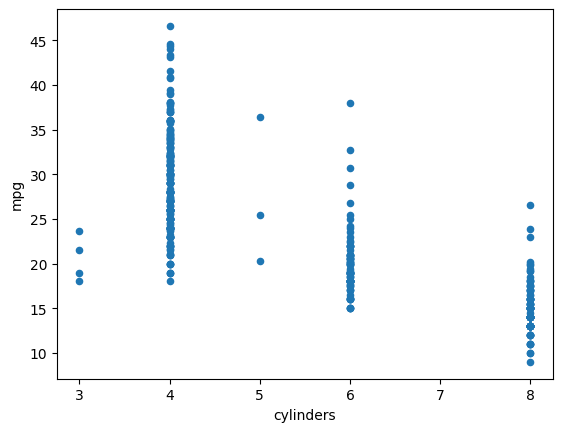

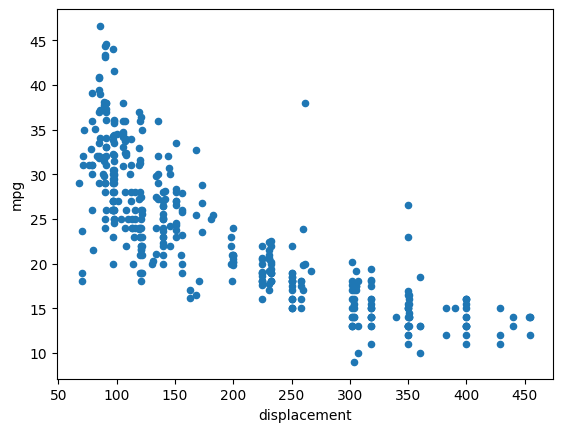

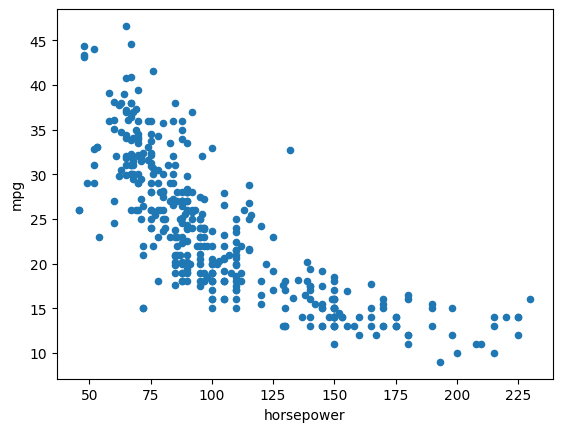

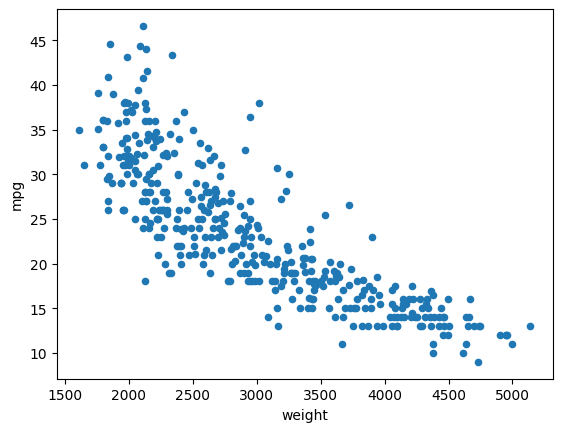

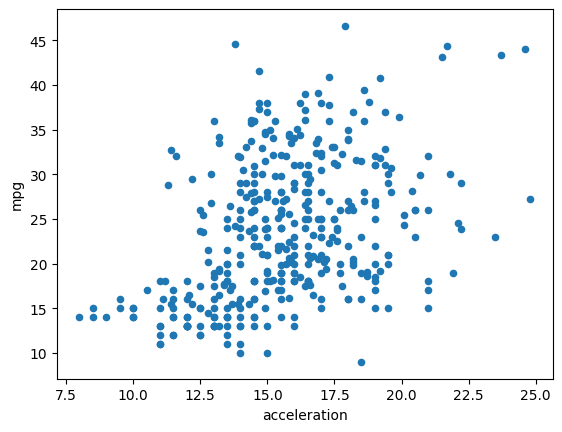

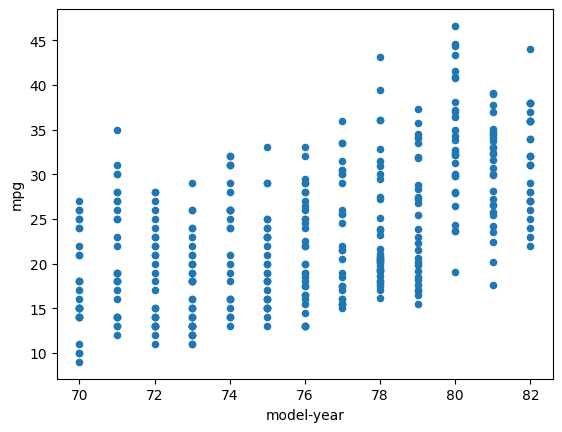

기울기 a :  [-0.00764542]
절편 b :  46.42045010290881
0.6744094188553618


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")

df.plot(kind='scatter', x='cylinders', y = 'mpg')
plt.show()
df.plot(kind='scatter', x='displacement', y = 'mpg')
plt.show()
df.plot(kind='scatter', x='horsepower', y = 'mpg')
plt.show()
df.plot(kind='scatter', x='weight', y = 'mpg')
plt.show()
df.plot(kind='scatter', x='acceleration', y = 'mpg')
plt.show()
df.plot(kind='scatter', x='model-year', y = 'mpg')
plt.show()

# 그래프를 확인해보니 horsepower, weight, displacement가 음의 상관관계를 보이므로 이중 하나를 통해 모델을 제작한다.
df.dropna(axis=0) # 결측치가 있는 2개의 행 제거

X = df[["weight"]]
y = df["mpg"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=10)

model = LinearRegression()
model.fit(X_train,y_train)

print("기울기 a : ", model.coef_)
print("절편 b : ", model.intercept_)

pred = model.predict(X_test)

from sklearn.metrics import r2_score
score = r2_score(y_test,pred)
print(score)

#### 다중 선형 회귀분석 알고리즘
* 하나의 독립변수가 아닌 여러 개의 독립변수를 사용한 회귀분석 기법이다.  
  - 단순 선형회귀가 독립변수를 하나 가지고 있는 선형 회귀분석이라면, 다중선형 회귀분석은 독립변수가 두 개 이상이고 종속변수가 하나인 선형회귀 분석이다.
    - y = ax1 + bx2 + .... + c (a,b,...)는 회귀계수, c는 y절편

In [1]:
import numpy as np
import pandas as pd


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

df = df.dropna(axis=0)
df = df.drop("ocean_proximity", axis = 1)

corr = df.corr(method='pearson')
print(corr)
X = df.drop("median_house_value", axis = 1)
y = df["median_house_value"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)
print("기울기 : ", lr.coef_)
print("절편 : " , lr.intercept_)

pred = lr.predict(X_test)

from sklearn.metrics import r2_score
score = r2_score(y_test,pred)퓨
print(score)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_

#### 의사결정나무 알고리즘
##### 알고리즘 개요
* 의사 결정을 위한 규칙을 나무모양으로 조합하여 목표변수에 대한 예측을 수행하는 기법이다.
* 이전에 학습한 분류 기능과는 달리 각 항목에서의 범주를 예측하는 것이 아니라 어떠한 값 자체를 예측하는 것이며, 의사결정나무를 학습하는 것은 최종적으론 회귀나무를 구축하는 과정이다.  
* 의사결정나무 기법을 사용한 분석은 시장조사, 광고조사, 품질관리 등 다양한 분야에서 활용되고 있으며, 타겟 고객분류, 고객 신용분류, 행동예측등에 사용된다.  

##### 알고리즘 특징
* 의사결정나무는 수학적인 지식없어도 결과를 해석하고 이해하기 쉽다.
* 수치 데이터 및 범주 데이터에 모두 사용이 가능하다.
* 과대 적합의 위험이 높기때문에, 학습 모델이 과대적합 혹은 과소적합 되지 않도록 적절히 조절되어야 한다.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
df.dropna(axis=0,inplace = True)
df.drop("ocean_proximity", axis=1, inplace = True)
X = df.drop("median_house_value", axis = 1)
y = df["median_house_value"]

X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 11)
dtr = DecisionTreeRegressor(max_depth = 3, random_state=11)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
score = r2_score(y_test, pred)
mse = mean_squared_error(y_test,pred)

print("ACC : " ,score, "/ MSE : ", mse)

ACC :  0.48612113296081694 / MSE :  6773756712.76895


#### 랜덤 포레스트 알고리즘
##### 알고리즘 개요
* 다수의 의사결정 트리들을 배깅하여 분류 또는 회귀를 수행하는 앙상블 기법이다.
* 각 트리는 전체 학습 데이터 중 서로 다른 데이터를 샘플링하여 일부 데이터를 제외한 후 최적의 특징을 찾아 트리를 분기한다.

##### 알고리즘 특징
* 다양한 분야에서 비교적 좋은 성능을 보여준다.
* 모델의 편향을 증가시켜 과대적합 위험을 감소시킨다.
* 트리들이 서로 조금씩 다른 특성을 갖게 되어 일반화 성능을 향상할 수 있다.
* 기본 매개변수 설정만으로도 좋은결과를 얻을 수 있다.
* 랜덤 포레스트의 특성 중요도는 각 트리의 특성 중요도를 취합한 것이다.

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

df = df.dropna(axis=0)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["ocean_proximity"] = encoder.fit_transform(df[["ocean_proximity"]])
corr = df.corr(method="pearson")

X = df.drop("median_house_value", axis = 1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rfr = RandomForestRegressor(max_depth=3, random_state=42)
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
score = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(score, mse)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.520254575100868 6560605416.775375


## 비지도학습
### 군집분석을 이용한 문제 해결
#### K-means 알고리즘
* 서로 유사한 데이터는 동일 그룹으로, 유사하지 않은 데이터는 다른 그룹으로 분류하는 군집분석의 대표적인 K-means 알고리즘은 K(그룹화하는 클러스터 또는 클러스터 중심 개수), means(각 클러스터 중심과 데이터들의 평균 거리, 클러스터 중심을 centroid로 칭함)로 구성된다.
* 데이터셋에서 K개의 centroids를 임시 지정한 뒤 각 데이터들을 가장 가까운 centroids가 속한 그룹에 할당, 다시 centroid 업데이트 후 centroid가 변하지 않을 때까지 반복함으로써 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작한다.  
  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_ini

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


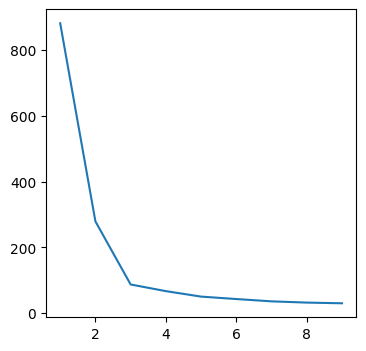

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

from sklearn.preprocessing import LabelEncoder

df["species"] = LabelEncoder().fit_transform(df["species"])
df.head()

df_copy = df
cluster1 = KMeans(n_clusters = 3, n_init=10, max_iter=500, random_state=42, algorithm="auto")
cluster1.fit(df)
cluster_center = cluster1.cluster_centers_
cluster_prediction = cluster1.predict(df)

print(cluster_prediction)
df_copy["cluster"] = cluster_prediction
df_copy

scope = range(1,10)
inertias = [] # inertia 는 군집별 오차 제곱의 합이다.

for k in scope:
  model = KMeans(n_clusters=k)
  model.fit(df)
  inertias.append(model.inertia_)
plt.figure(figsize = (4,4))
plt.plot(scope,inertias)
plt.show() # k 가 3일때 바르게 감소한다. 즉 elbow기법으로 보면 K=3이 가장 적합.

### 연관분석 알고리즘
#### 연관분석 알고리즘
* 연관분석은 하나의 거래나 사건에 포함된 항목 간의 관련성을 파악하여 둘 이상의 항목들로 구성된 연관성 규칙을 도출한다.
* 장바구니 분석으로 알려져 있으며 연관성을 찾아내기 위해서는 연관성을 비교할 수 있는 규칙이 필요한데 규칙을 발견하기 위해 지지도, 신뢰도, 향상도를 평가척도로 사용한다.
  - 지지도 : A와 B를 모두 포함하는 경우의 확률로 클수록 관련도가 높다.
  - 신뢰도 : A를 포함하는 경우에서 B를 포함하는 경우 수로 클수록 관련도가 높다.
  - 향상도 : 임의로 B가 포함되는 경우에 비해 A와의 관계가 고려되어 포함되는 경우의 비율이다.
    - lift(A->B) > 1 : 클수록 관련도가 높음
    - lift(A->B) = 1 : 관련이 없음
    - 0 < lift(A->B) < 1 : A를 선택하면 보통 B를 선택하지 않음

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BigData분석기사CSV파일/retail_dataset.csv")
df
items = set()

for col in df:
  items.update(df[col])

itemset = set(items)
encoding=[]
for index, row in df.iterrows():
  rowset = set(row)
  labels = {}
  dismatching = list(itemset - rowset)
  matching = list(itemset.intersection(rowset))
  for i in dismatching:
    labels[i]=0
  for j in matching:
    labels[j] = 1
  encoding.append(labels)

result = pd.DataFrame(encoding)
result = result.drop(result.columns[0], axis=1)

freq_items = apriori(result, min_support=0.2, use_colnames=True)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
print(rules)

       antecedents consequents  antecedent support  consequent support  \
0          (Bagel)     (Bread)            0.425397            0.504762   
1           (Milk)    (Cheese)            0.501587            0.501587   
2         (Cheese)      (Milk)            0.501587            0.501587   
3           (Wine)    (Cheese)            0.438095            0.501587   
4           (Eggs)    (Cheese)            0.438095            0.501587   
5           (Meat)    (Cheese)            0.476190            0.501587   
6         (Cheese)      (Meat)            0.501587            0.476190   
7           (Eggs)      (Meat)            0.438095            0.476190   
8     (Milk, Meat)    (Cheese)            0.244444            0.501587   
9   (Meat, Cheese)      (Milk)            0.323810            0.501587   
10  (Milk, Cheese)      (Meat)            0.304762            0.476190   
11    (Meat, Eggs)    (Cheese)            0.266667            0.501587   
12  (Meat, Cheese)      (Eggs)        